In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
data = pd.read_csv("/Users/talvinderjohal/Desktop/Talvinder Strive Course/Hippocratia Challenge/heart.csv.xls")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [120]:
data.shape

(303, 14)

In [121]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [122]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [123]:
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numerical = ["age","trtbps","chol","thalachh","oldpeak"]

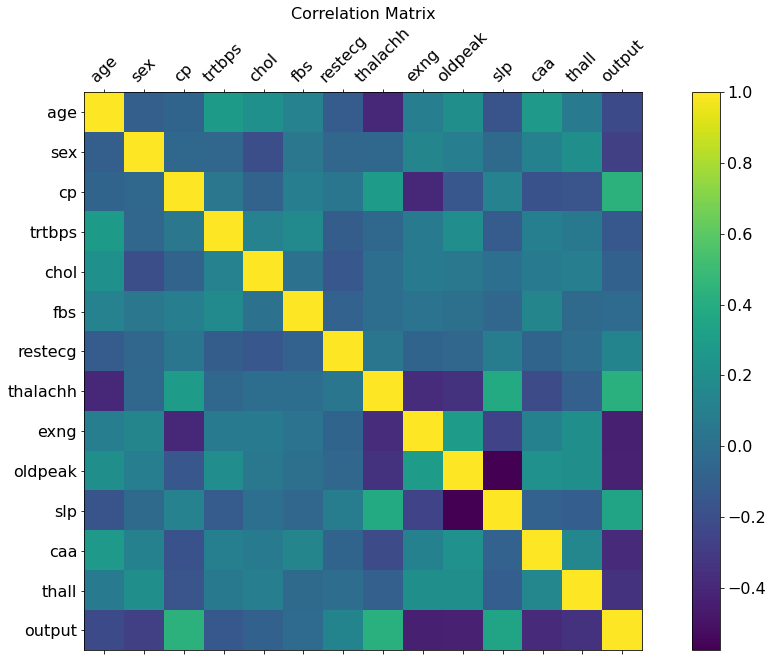

In [124]:
f = plt.figure(figsize=(18, 10))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=16, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix', fontsize=16);

In [125]:
X = data.iloc[:,:-1].values
y = pd.DataFrame(data["output"]).values.flatten()

In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [128]:
from sklearn.metrics import accuracy_score
acc_df = pd.DataFrame(columns=["Name", "Accuracy_score"])

# SVM Model

In [129]:
from sklearn.svm import SVC
model = SVC().fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

acc = accuracy_score(y_test, y_pred)

a_series = pd.Series(["SVC", acc], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

# Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression().fit(x_train_scaled, y_train)
y_pred_lr = model_lr.predict(x_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)

a_series = pd.Series(["Logistic Regression", acc_lr], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

# Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=100, max_depth=4).fit(x_train_scaled, y_train)
y_pred_rfc = model_rfc.predict(x_test_scaled)
acc_rfc = accuracy_score(y_test, y_pred_rfc)

a_series = pd.Series(["Random Forest", acc_rfc], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

# KNN Model

In [132]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=4).fit(x_train_scaled, y_train)
y_pred_knn = model.predict(x_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)

a_series = pd.Series(["KNN", acc_knn], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

# Gradient Boosting

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1).fit(x_train_scaled, y_train)
y_pred_gbc = model_gbc.predict(x_test_scaled)
acc_gbc = accuracy_score(y_test, y_pred_gbc)

a_series = pd.Series(["Gradient Boosting", acc_gbc], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

In [134]:
acc_df

,Name,Accuracy_score
0,SVC,0.855263
1,Logistic Regression,0.828947
2,Random Forest,0.855263
3,KNN,0.855263
4,Gradient Boosting,0.868421


In [135]:
from sklearn.model_selection import GridSearchCV

